<a href="https://colab.research.google.com/github/Praveen3110/ML-zoomcamp-homework/blob/main/DATATALKS_CLASSIFICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data="https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [3]:
!wget $data

--2025-11-09 20:35:40--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.07s   

2025-11-09 20:35:41 (13.6 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

DATA PREPARATION

In [5]:
df.shape

(7043, 21)

In [6]:
df.head().T #transpose the dataframe

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.columns=df.columns.str.lower().str.replace(" ","_") #to make all the column uniform and fill the empty space with underscore

categorical_columns=list(df.dtypes[df.dtypes=="object"].index)#seperately removing the categorical variables
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [11]:
for c in categorical_columns:
  df[c]=df[c].str.lower().str.replace(" ","_") #this loop will make all the values in the columns uniform

In [12]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [13]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [14]:
tc=pd.to_numeric(df.totalcharges,errors="coerce") #this will ignore the erroes in the data

In [15]:
df[tc.isnull()][["customerid","totalcharges"]] #this will show the null values

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [16]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors="coerce") #changing the dtype from object to numeric

In [17]:
df.totalcharges=df.totalcharges.fillna(0) #filling all th null values to zero

In [18]:
df.totalcharges.isnull().sum()

np.int64(0)

In [19]:
df.churn

,churn
0,no
1,no
2,yes
3,no
4,yes
...,...
7038,no
7039,no
7040,no
7041,yes


In [20]:
df.churn=(df.churn=="yes").astype(int) #converting all the yes or no into binary numbers

In [21]:
df.churn

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [22]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


setting up the validation framework

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
train_test_split?

In [25]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1) #splitting the dataset into full train and test

In [26]:
len(df_full_train),len(df_test)

(5634, 1409)

In [27]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1) #splitting the full train dataset into train and validate

In [28]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [29]:
df_train #index in the dataset are randomly arranged

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [30]:
df_full_train=df_full_train.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
#resetting all the index

In [31]:
#output variables
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values


In [32]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]
#deleting the output variable from the x input variable


EDA Exploratory Data Analysis

In [33]:
df_full_train.isnull().sum() #check for missing values


,0
customerid,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [34]:
df_full_train.churn.value_counts() #looking for the target variable

,count
churn,
0,4113
1,1521


In [35]:
df_full_train.churn.value_counts(normalize=True) #will give the value in percentage #1 chrun,#0 no churn

,proportion
churn,
0,0.730032
1,0.269968


In [36]:
global_churn_rate=df_full_train.churn.mean()
round(global_churn_rate,2)

np.float64(0.27)

In [37]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [38]:
df_full_train.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [39]:
numerical=["totalcharges","monthlycharges","tenure"]

In [40]:
categorical=['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [41]:
df_full_train[categorical].nunique() #unique values from the categorical variable


,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


FEATURE IMPORTANCE :CHURN RATE AND RISK RATE

feature importance analysis(part of EDA ) - identify which features affects our target variable

chrun rate


In [42]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


churn rate for gender variable

In [43]:
churn_female=df_full_train[df_full_train.gender=="female"].churn.mean()
churn_female #checking the churn rate for feamle

np.float64(0.27682403433476394)

In [44]:
churn_male=df_full_train[df_full_train.gender=="male"].churn.mean()
churn_male #checking the churn rate for male

np.float64(0.2632135306553911)

In [45]:
global_churn=df_full_train.churn.mean()
global_churn #global churn rate

np.float64(0.26996805111821087)

In [46]:
global_churn-churn_female #difference is less so there will be less impact

np.float64(-0.006855983216553063)

In [47]:
global_churn-churn_male #difference is less so there will be less impact

np.float64(0.006754520462819769)

chrun rate for partner variable

In [48]:
churn_partner=df_full_train[df_full_train.partner=="yes"].churn.mean()
churn_partner #chrun rate of persons with partner

np.float64(0.20503330866025166)

In [49]:
churn_no_partner=df_full_train[df_full_train.partner=="no"].churn.mean()
churn_no_partner #chrun rate of persons with no partner

np.float64(0.3298090040927694)

In [50]:
global_churn=df_full_train.churn.mean()
global_churn #global churn rate

np.float64(0.26996805111821087)

In [51]:
global_churn-churn_partner #more than global ,difference is big  so there will be significance impact with the partner variable

np.float64(0.06493474245795922)

In [52]:
global_churn-churn_no_partner #more than global ,difference is big  so there will be significance impact with the partner variable

np.float64(-0.05984095297455855)

If the difference between the global and group(partner[yes,no],gender[male,female] is less than zero then more likely to churn if greater than zero then less likey to churn

RISK RATIO

RISK=GROUP/GLOBAL

">1 more likely to churn,
<1 less likely to churn"

In [53]:
churn_partner/global_churn #less likely to churn

np.float64(0.7594724924338315)

In [54]:
churn_no_partner/global_churn #more likely to churn

np.float64(1.2216593879412643)

In [55]:
from IPython.display import display

In [56]:
#to do the churn rate and risk ratio calcuation to each and every categorical variable
for c in categorical:
  print(c)
  df_group=df_full_train.groupby(c).churn.agg(["mean","count"])
  df_group["diff"]=df_group["mean"]-global_churn
  df_group["risk"]=df_group["mean"]/global_churn
  display(df_group)
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


feature importance:mutual importance

it is a value or weight to measure the importance of categorical variable

In [57]:
from sklearn.metrics import mutual_info_score

In [58]:
mutual_info_score(df_full_train.contract,df_full_train.churn) #mutual_info_score(x_column,y_column) #important  #more mutual wieght to churn

np.float64(0.0983203874041556)

In [59]:
mutual_info_score(df_full_train.gender,df_full_train.churn)  #less mutual weight to churn

np.float64(0.0001174846211139946)

In [60]:
mutual_info_score(df_full_train.partner,df_full_train.churn) #less mutual weight

np.float64(0.009967689095399745)

In [61]:
for c in categorical:
  print(c)
  print(mutual_info_score(df_full_train[c],df_full_train.churn)) #less mutual weight
  print()
  print()


gender
0.0001174846211139946


seniorcitizen
0.009410216144208144


partner
0.009967689095399745


dependents
0.012345815445534689


phoneservice
0.00022871269738296285


multiplelines
0.0008574478744731856


internetservice
0.055867945893496467


onlinesecurity
0.06308524972985574


onlinebackup
0.0469234640537918


deviceprotection
0.04345286925268559


techsupport
0.06103245991777444


streamingtv
0.03185333110086085


streamingmovies
0.03158089669519908


contract
0.0983203874041556


paperlessbilling
0.01758882715925275


paymentmethod
0.043210027531582915




In [62]:
def mutual_info_churn_score(series):
  return mutual_info_score(series,df_full_train.churn)

In [63]:
mi=df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False) #most important comes first
#top 7 will be very important

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


feature importance :correlation

it is the weight of measuring the degree of dependency between two variable

it is a way to measure the dependency between two variable

for negative corelation one value increses and another decreases and if the correlation is positive then one value increase then other also increases

In [64]:
df_full_train.tenure.max()


72

Positive corelation means more tenure - higher churn
negative corelation means more tenure - less churn
zero - no effect of churn

In [65]:
df_full_train[numerical].corrwith(df_full_train.churn)
#total charges and tenure are negative correlate with each other


,0
totalcharges,-0.196353
monthlycharges,0.196805
tenure,-0.351885


In [66]:
#less than 2 month of tenure
df_full_train[df_full_train.tenure<=2].churn.mean() #in company is two month less - high churn rate
#less working more churn rate

np.float64(0.5953420669577875)

In [67]:
#in between 2 to 12 months of tenure
df_full_train[(df_full_train.tenure>2) & (df_full_train.tenure<12) ].churn.mean() #moderate working moderate churn rate

np.float64(0.4059003051881994)

In [68]:
#greater than 12 months of tenure
df_full_train[df_full_train.tenure>=12].churn.mean() #long working period - less churn rate

np.float64(0.17986881937436933)

In [69]:
#less than 20 dollar
df_full_train[df_full_train.monthlycharges<20].churn.mean()

np.float64(0.08829568788501027)

In [70]:
#between 20 adn 50 dollar
df_full_train[(df_full_train.monthlycharges>20) & (df_full_train.monthlycharges <50)].churn.mean()

np.float64(0.1836890243902439)

In [71]:
#more than 50 dollar
df_full_train[df_full_train.monthlycharges>50].churn.mean()

np.float64(0.32499341585462205)

In [72]:
df_full_train[numerical].corrwith(df_full_train.churn).abs().sort_values(ascending=False)
#tenure is the most important variable
#next to tenure monthly charges and then total charges


,0
tenure,0.351885
monthlycharges,0.196805
totalcharges,0.196353


ONE HOT ENCODING

USING SKLEARN TO ENCODE CATEGORICAL VARIABLE


In [73]:
from sklearn.feature_extraction import DictVectorizer


In [74]:
df_train[["gender","contract"]]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
4220,male,one_year
4221,male,month-to-month
4222,male,month-to-month
4223,female,two_year


In [75]:
dicts=df_train[["gender","contract","tenure"]].iloc[:100].to_dict(orient="records")
dicts[0]
#for numerical variable it dontent impact anything with dict vectorizor

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [76]:
dv=DictVectorizer(sparse=False) #we change dictionary and turn it into vector # we dont need sparse matrix

In [77]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [78]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [79]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

applying the dict vectorizor

In [80]:
#for training dataset
train_dicts=df_train[categorical + numerical ].to_dict(orient="records")
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'totalcharges': 8425.15,
 'monthlycharges': 115.5,
 'tenure': 72}

In [81]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts)
dv.get_feature_names_out()[0]

'contract=month-to-month'

In [82]:
x_train=dv.transform(train_dicts)

In [83]:
x_train.shape

(4225, 45)

In [84]:
#for validation dataset
val_dicts=df_val[categorical + numerical].to_dict(orient="records")

In [85]:
x_val=dv.transform(val_dicts) #not fitting to the dict vectorizor
x_val.shape

(1409, 45)

In [86]:
train_dicts=df_train[categorical + numerical ].to_dict(orient="records")
x_train=dv.fit_transform(train_dicts) #for train we use fit and transform

val_dicts=df_val[categorical + numerical].to_dict(orient="records")
x_val=dv.transform(val_dicts) #for val we use transform

logistic regression

In [87]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
#this is the function that use to conver the scor into probabiliy(0,1)

In [88]:
z=np.linspace(-7,7,51)

In [89]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

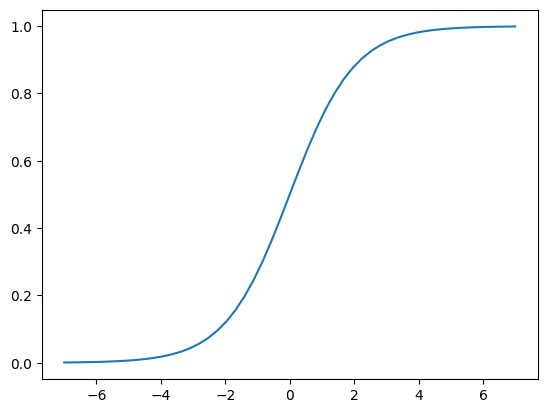

In [90]:
plt.plot(z,sigmoid(z))

In [91]:
def linear_regression(xi):
  result =w0 #w0 is bias

  for j in range(len(w)):
    result=result + wi[j] * w[j]
    return result

In [92]:
#the maths behind the logistic regression is nothing but applu=ying the sigmoid function to the linear regression

def logistic_regression(xi):
  score =w0 #w0 is bias

  for j in range(len(w)):
    score=score + wi[j] * w[j]

    result =sigmoid(score)
    return result

training the logistic regression with scikit learn

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
model.intercept_[0] #bias

np.float64(-0.1109287445794238)

In [96]:
model.coef_[0].round(3) #weights

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

### Explanation of `model.intercept_[0]` and `model.coef_[0].round(3)`

- `model.intercept_[0]`: This is the **bias term** or **intercept** of the logistic regression model. It represents the estimated log-odds of the target variable (churn in this case) when all independent variables are zero. In simpler terms, it's the baseline probability of churn when all other factors are not considered or are at their base level.

- `model.coef_[0].round(3)`: These are the **coefficients** or **weights** assigned by the logistic regression model to each of your features, rounded to three decimal places. Each coefficient indicates the impact of a one-unit change in the corresponding feature on the log-odds of the customer churning, *holding all other features constant*.
    - A **positive coefficient** means that as the feature value increases, the log-odds of churn increase (making churn more likely).
    - A **negative coefficient** means that as the feature value increases, the log-odds of churn decrease (making churn less likely).

In [97]:
print(f"Model Intercept: {model.intercept_[0]}")
print(f"Model Coefficients (rounded to 3 decimal places): {model.coef_[0].round(3)}")

Model Intercept: -0.1109287445794238
Model Coefficients (rounded to 3 decimal places): [ 0.564 -0.154 -0.519 -0.013 -0.095  0.071 -0.098 -0.082 -0.033 -0.076
 -0.354  0.343 -0.098  0.002 -0.251  0.162 -0.02   0.066 -0.098 -0.076
  0.251 -0.098 -0.261 -0.228  0.119 -0.121  0.012 -0.095 -0.03   0.045
 -0.028  0.162 -0.271  0.221 -0.097 -0.098  0.087 -0.05  -0.098  0.039
  0.194 -0.098 -0.205 -0.072  0.   ]


In [98]:
model.predict(x_train) #hard prediction we dont know the certanity

array([0, 1, 1, ..., 1, 0, 1])

In [99]:
model.predict_proba(x_train) #soft prediction , first column is probalility of being negative class and second probabily of being positive class

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]])

In [100]:
model.predict_proba(x_val)[:,1]#using only the second column(1[probabilty of churn])

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774])

In [101]:
y_pred=model.predict_proba(x_val)[:,1]

In [102]:
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774])

In [103]:
churn_decision=(y_pred>=0.5)
#here it doesnt filter it just check whether it is greater then 0.5 or not
churn_decision
churn_decision.shape
 #0.5 is the threshold value

(1409,)

In [104]:
churn_decision

array([False, False, False, ..., False,  True,  True])

Let's check the number of customers predicted to churn (where `y_pred >= 0.5`):

In [105]:
num_predicted_churn = churn_decision.sum()
print(f"Number of customers predicted to churn (y_pred >= 0.5): {num_predicted_churn}")
print(f"Total customers in validation set: {len(y_val)}")

Number of customers predicted to churn (y_pred >= 0.5): 322
Total customers in validation set: 1409


In [106]:
df_val[churn_decision] #these people will churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [107]:
y_val.shape

(1409,)

In [108]:
churn_decision


array([False, False, False, ..., False,  True,  True])

In [109]:
y_pred.shape

(1409,)

In [110]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [111]:
(y_val==churn_decision).mean()

np.float64(0.801277501774308)

In [112]:
df_pred=pd.DataFrame()
df_pred["probability"]=y_pred
df_pred["prediction"]=churn_decision.astype(int)
df_pred["actual"]=y_val

In [113]:
df_pred

,probability,prediction,actual
0,0.007863,0,0
1,0.209928,0,0
2,0.223710,0,0
3,0.561123,1,1
4,0.219586,0,0
...,...,...,...
1404,0.297790,0,0
1405,0.035463,0,1
1406,0.150149,0,0
1407,0.776681,1,1


In [114]:
df_pred["correct"]= df_pred.prediction==df_pred.actual

In [115]:
df_pred.correct.mean()

np.float64(0.801277501774308)

model interpretaion


In [116]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [118]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [124]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

example for zip function

In [123]:
a=[1,2,3,4,5]
b="abcde"
list(zip(a,b)) #gives a list of touple
dict(zip(a,b))#gives in dictionary

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}

In [128]:
small=["contract","tenure","monthlycharges"]
df_train[small].iloc[:10].to_dict(orient="records")

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [134]:
dict_train_small=df_train[small].to_dict(orient="records") #train
dicts_val_small=df_train[small].to_dict(orient="records") #validate

In [135]:
dv_small=DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [136]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [138]:
x_train_small=dv_small.transform(dict_train_small)

In [139]:
model_small=LogisticRegression()
model_small.fit(x_train_small,y_train)

LogisticRegression()

In [140]:
bias=model_small.intercept_[0]
bias

np.float64(-2.477957595829565)

In [141]:
weight=model_small.coef_[0]
weight.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [142]:
dict(zip(dv_small.get_feature_names_out(),weight.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

using the model

In [143]:
dicts_full_train=df_full_train[categorical+numerical].to_dict(orient="records")

In [145]:
dv=DictVectorizer(sparse=False)
x_full_train=dv.fit_transform(dicts_full_train)


In [147]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [146]:
y_full_train=df_full_train.churn.values

In [152]:
model=LogisticRegression()

In [153]:
model.fit(x_full_train,y_full_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

try to fit the model in the test dataset

In [154]:
dicts_test=df_test[categorical+numerical].to_dict(orient="records")

In [155]:
x_test=dv.transform(dicts_test)

In [162]:
y_pred=model.predict_proba(x_test)[:,1]

In [163]:
churn_decision=(y_pred>0.5)

In [164]:
(churn_decision==y_test).mean()

np.float64(0.8140525195173882)

using the model

In [167]:
customer=dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'totalcharges': 2861.45,
 'monthlycharges': 93.95,
 'tenure': 32}

In [171]:
x_small=dv.transform([customer])

In [172]:
x_small.shape

(1, 45)

In [174]:
model.predict_proba(x_small)[0,1]

np.float64(0.4979219389473276)

In [175]:
y_test[10]

np.int64(0)

SUMMARY


DATA PREPARATION

1.DOWNLOAD THE DATA,READ IT WITH PANDAS

2.LOOK AT THE DATA

3.MAKE COLUMN NAMES AND VALUE LOOK UNIFORM

4.CHECK IF ALL THE CLUMNS READ CORRECTLY

5.CHECK IF THE CHURN VARIABLE NEEDS ANY PREPARATION





SETTING UP THE VALIDATION FRAMEWORK

1.PERFRM THE TRAIN/VAL/TEST SPLIT WITH SCIKITLEARN



EDA

1.CHECK FOR THE MISSING VALUES

2.LOOK AT THE TARGET VARIBALE(CHURN)

3.LOOK AT THE NUMERICAL AND CATEGORICAL VARIABLE


FEATURE IMPORTANCE: CHURN RATE AND RISK RATIO

1.FEATURE IMPORTANCE ANALUSIS(PART OF EDA)=IDENTIFYING WHICH FEATURE AFFECTS THE TARGET MOST

2.CHURN RATE,RISK RATIO


3.MUTUAL INFORMATION(CONCEPT TELL US HOW MUCH WE CAN LEARN ABOUT ONE VARIABLE IF WE KNOW THE VALUE OF ANOTHER


ONEHOT ENCODING


1.USE SCIKIT LEARN TO ENCODE CATEGORICAL FEATURES


LOGISTIC REGRESSION

1.BINARY CLASSIFICATION

2.LINEAR REGRESSION VS LOGISTIC REGRESSION



TRAINING THE LOGISTIC REGRESSION WITH SCIKIT LEARN

1.TRAIN MODEL WITH SCIKIT-LEARN

2.APPLY IT TO VALIDATION DATASET

3.CALCUALTE THE ACCURACY


USING THE MODEL
